## Introducción

En el siguiente proyecto, trabajaré con una base de datos de una empresa de transporte individual, analizaré los datos de los competidores y probaré una hipótesis sobre el impacto del clima en la frecuencia de los viajes realizados.

Mi objetivo es encontrar patrones en la información disponible para comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

## 1. Inicialización

In [1]:
#importar librerías
import pandas as pd
import numpy as np
from scipy import stats as st
import math as mt
from math import factorial
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import requests

## Cargar datos

In [2]:
#leer las bases de datos en dataframes
sql_result_01 = pd.read_csv('datasets/project_sql_result_01.csv')
sql_result_04 = pd.read_csv('datasets/project_sql_result_04.csv')
sql_result_07 = pd.read_csv('datasets/project_sql_result_07.csv')

## 2. Preparar los datos

##### 2.1 Analizando conjunto de datos #01

In [3]:
#imprimir informacion general del conjunto #01
sql_result_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


Tipos de datos correctos en cada columna.

In [4]:
#imprimir muestra de datos del conjunto #01
sql_result_01.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [5]:
#buscando duplicados en el conjunto #01
sql_result_01.duplicated().sum()

0

In [6]:
#buscando valores ausentes en el conjunto #01
sql_result_01.isna().sum()

company_name    0
trips_amount    0
dtype: int64

Sin valores ausentes ni duplicados en el conjunto #01.

##### 2.2 Analizando conjunto de datos #04

In [7]:
#imprimir informacion general del conjunto #04
sql_result_04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


Tipos de datos correctos en cada columna.

In [8]:
#imprimir muestra de datos del conjunto #04
sql_result_04.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [9]:
#buscando valores duplicados
sql_result_04.duplicated().sum()

0

In [10]:
#buscando valores ausentes
sql_result_04.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

Sin valores ausentes ni duplicados en el conjunto #04.

##### 2.3 Analizando conjunto de datos #07

In [11]:
#imprimiendo informacion general del conjunto 07
sql_result_07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


El tipo de datos en la columna correspondiente a la fecha y hora es 'object'. Lo modificaré a formato fecha. El resto de columnas tienen un tipo de datos correcto.

In [12]:
#imprimiendo muestra de datos
sql_result_07.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [13]:
#buscando valores duplicados
sql_result_07.duplicated().sum()

197

Encontré 197 valores duplicados en este dataframe. Quizás se produjeron al momento de unir las tablas en la base de datos.

In [14]:
#buscando valores ausentes
sql_result_07.isna().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

Sin valores ausentes en este dataframe.

##### 2.3.1 Corregir datos en el conjunto #07

In [15]:
#cambiar el tipo de datos a formato fecha en 'start_ts'
sql_result_07['start_ts'] = pd.to_datetime(sql_result_07['start_ts'], format = '%Y-%m-%d %H:%M:%S')

In [16]:
#eliminar valores duplicados en el conjunto #07
sql_result_07 = sql_result_07.drop_duplicates().reset_index()

## 3. Análisis de datos

### 3.1. 10 principales barrios en términos de finalización

In [17]:
#crear una variable con los 10 principales barrios 
top_ten_neighborhoods = sql_result_04.sort_values('average_trips', ascending=False).head(10)

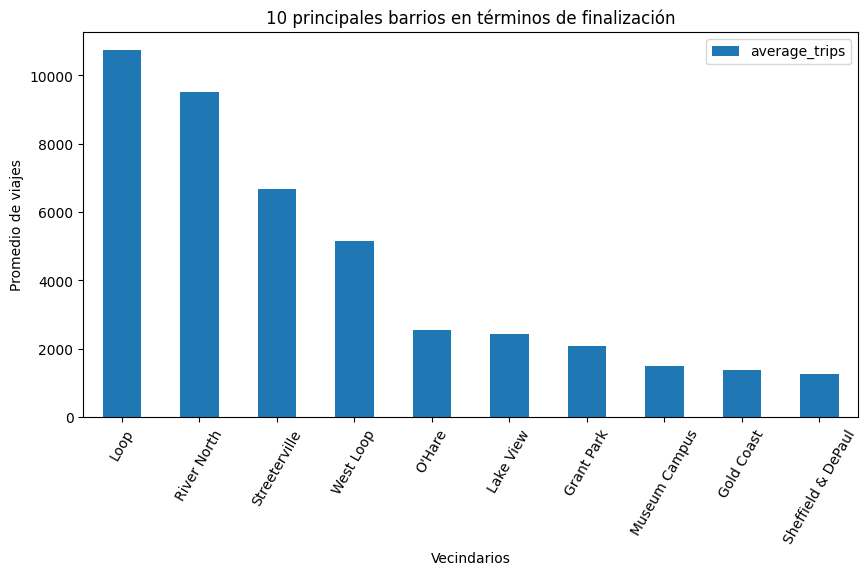

In [18]:
#crear una distribucion de los 10 principales barrios                                                       
top_ten_neighborhoods.plot(kind ='bar',
                           x = 'dropoff_location_name',
                           y = 'average_trips',
                           xlabel='Vecindarios',
                           ylabel='Promedio de viajes',
                           title= '10 principales barrios en términos de finalización',
                          figsize=[10,5],
                          rot= 60
                          )

plt.show()

De acuerdo con la información que se aprecia en el gráfico, los vecindarios con más viajes finalizados son: Loop, River North, Streeterville y West Loop, con un promedio desde los 5.000 viajes hacia arriba. Luego de eso, el promedio baja drásticamnte con el resto de los vecindarios con más viajes finalizados.

### 3.2. 10 Principales compañias y número de viajes

In [19]:
#crear una variable con los 10 principales compañias 
top_ten_companies = sql_result_01.sort_values('trips_amount', ascending=False).head(10)

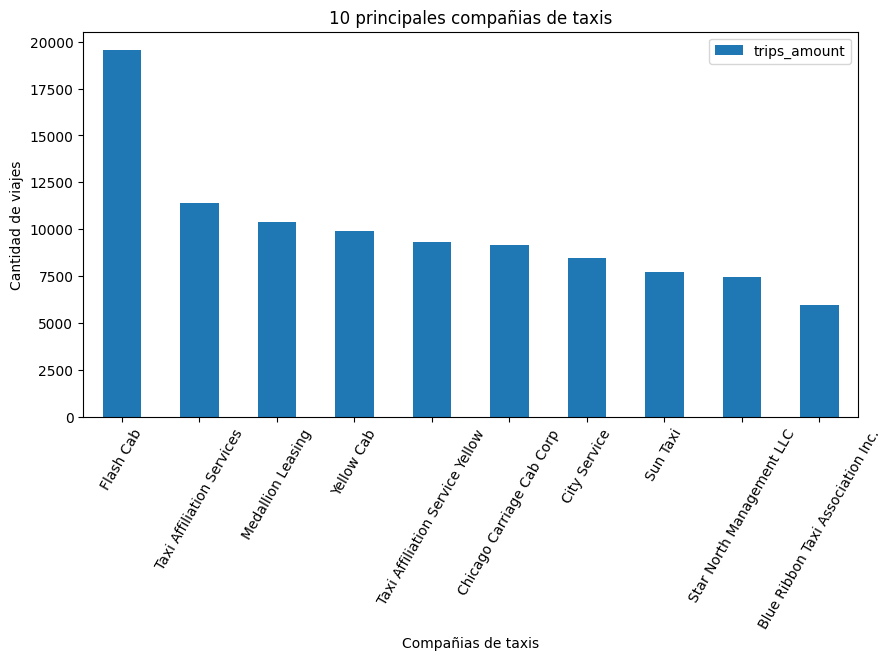

In [22]:
#crear una distribucion de los 10 principales compañias                                                       
top_ten_companies.plot(kind ='bar',
                           x = 'company_name',
                           y = 'trips_amount',
                           xlabel='Compañias de taxis',
                           ylabel='Cantidad de viajes',
                           title= '10 principales compañias de taxis',
                          figsize=[10,5],
                          rot= 60
                          )

plt.show()

De acuerdo con esta gráfica podemos concluir que la compañía con más número de viajes es 'Flash cab', quien supera a la competencia con una racha de casi 20.000 viajes, marcando una clara ventaja. Luego se aprecia que la cantidad de viajes realizados por el resto de las compañías se manteniene muy parecida, en un rango de 11.000 a 6.000 viajes acumulados.